# Machine learning foundation

## Logistic Regression

### Introduction
We will use the Human activity Recognition with smartphone dataset. 

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

In [1]:
import os, seaborn as sns, pandas as pd, numpy as np
os.chdir('data')

In [2]:
filepath='Human_Activity_Recognition_Using_Smartphones_Data.csv'
data=pd.read_csv(filepath, sep=',')

In [3]:
## The datatype of columns
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [4]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [5]:
data.iloc[:,:-1].min().value_counts()

-1.0    561
dtype: int64

In [6]:
data.iloc[:,:-1].max().value_counts()

1.0    561
dtype: int64

In [7]:
data['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [11]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['Activity']=le.fit_transform(data.Activity)
data.Activity.sample(5)

6976    2
3346    0
2498    4
7028    0
2184    4
Name: Activity, dtype: int32

- Calculate the corrections between the dependent variables
- Create a histogram of the correlation values
- Indentify those that are most correlated

In [12]:
# Calculate the correlation
feature_cols=data.columns[:-1]
corr_values=data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index=np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

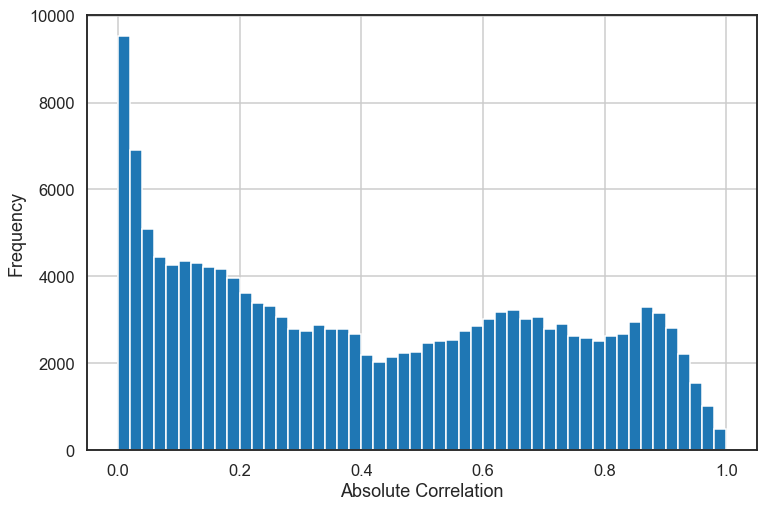

In [14]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [15]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [16]:
corr_values

,feature1,feature2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split=StratifiedShuffleSplit(n_splits=1,
                                      test_size=0.3,
                                      random_state=42)

train_idx, test_idx=next(strat_shuf_split.split(data[feature_cols], 
                                                data.Activity))

# Create dataframes
X_train=data.loc[train_idx,feature_cols]
y_train=data.loc[train_idx,"Activity"]

X_test=data.loc[test_idx,feature_cols]
y_test=data.loc[test_idx,"Activity"]

In [18]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [19]:
y_test.value_counts(normalize=True)



0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

#### Fit a logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='liblinear').fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [21]:
from sklearn.linear_model import LogisticRegressionCV

lr_l1=LogisticRegressionCV(Cs=10, cv=4, penalty='l1',
                           solver='liblinear').fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [22]:
lr_l2=LogisticRegressionCV(Cs=10, cv=4, penalty='l2',
                           solver='liblinear').fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### Compare the magnitude of the coefficients

In [23]:
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
74  -0.103817 -0.227167  0.241250 -0.309442 -0.179884  0.319094 -0.106642   
49  -1.816017  2.981074  1.359263  0.087339 -0.037384 -0.095950 -3.433915   
211 -0.005534  0.135920 -0.137265 -0.401044  0.180211  0.159214  0.074213   
361 -0.029097  0.061203 -0.048400 -0.058914 -0.051001 -0.288638 -0.039325   
67   0.042529  0.283174 -0.094862  0.335550 -0.619721  0.153134  0.141938   
12  -0.057144  0.466800  0.158404 -0.112620  0.892966 -0.742814  0.141865   
156  0.158619 -1.055557  0.662775  0.586387 -0.450626 -1.521089  1.215046   
204 -0.022679 -0.019094  0.041115  0.509278 -0.106082  0.355072  0.070166   
106 -0.141034  0.320384 -0.184481 -0.166064 -0.654003 -0.029494 -1.382558   
395 -0.030576  0.068774 -0.056179 -0.403861  0.493854  0.034115  0.051689   

                                                              l2             \
             1         2         3         4         5         0          1   
74   -0.194856  0.000000 -0.093078 -0.051969 -0.089246 -0.194274  -1.305793   
49   14.460652  0.807697  0.000000 -0.004834 -0.174637 -3.359454  10.814556   
211   0.000000  0.000000 -1.567649  0.732091  2.034230 -0.024189   0.428962   
361   0.000000  0.000000 -0.137196  0.000000 -0.562156 -0.067628   0.038234   
67    0.000000  0.000000  0.208184 -0.498044  0.349701  0.135758   0.754162   
12    4.094149  0.000000 -0.504814  2.808389 -2.853846 -0.100464   2.418033   
156  -7.616367  2.252019  0.852565 -1.418825 -7.429490  0.342318  -4.075895   
204   0.000000  0.000000  0.616247  0.063286  0.553260 -0.036959  -0.141362   
106   5.842440 -0.351738 -0.945600 -2.473555 -1.309498 -0.283655   3.218318   
395   0.000000  0.000000 -0.306392  0.389333  0.235616 -0.066040  -0.095730   

                                             
            2         3         4         5  
74   0.425367 -0.765747 -0.201131  0.264237  
49   1.730477  0.129453 -0.254494 -0.233456  
211 -0.175779 -1.303384  0.392199  0.593307  
361 -0.074891 -0.416832 -0.072049 -0.447570  
67  -0.086988  0.376458 -1.110822  0.279755  
12   0.163567 -0.694558  1.820599 -1.831622  
156  1.415368  1.044700 -0.863409 -3.487660  
204  0.061267  1.203727  0.033416  0.660375  
106 -0.743555 -0.670256 -1.388791  0.018741  
395 -0.070497 -1.040766  1.004477  0.344483

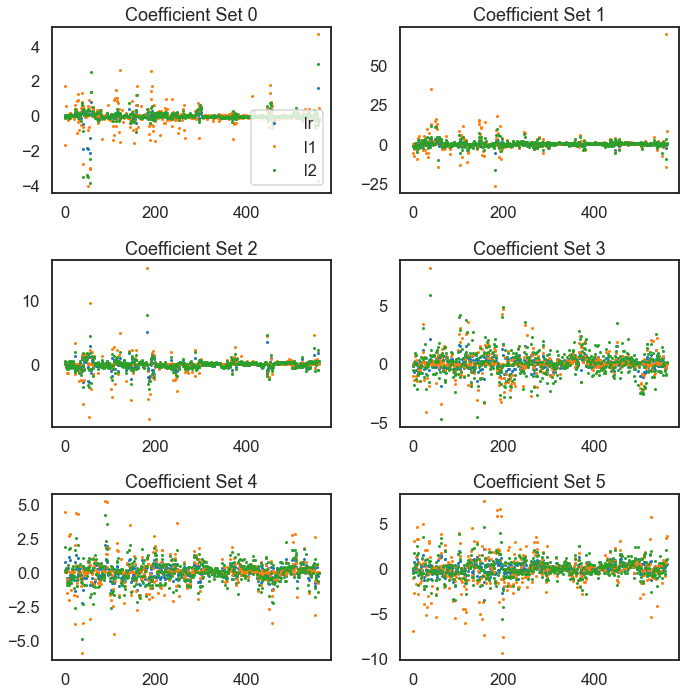

In [24]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

#### Predict and store the class for each model

In [26]:
# predict the class and the probability for each 
y_pred=list()
y_prob=list()

coeff_labels=['lr','l1','l2']
coeff_models=[lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred=pd.concat(y_pred, axis=1)
y_prob=pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [27]:
y_prob.head()

,lr,l1,l2
0,0.998939,0.998965,0.999757
1,0.988165,0.999522,0.999477
2,0.987592,0.999028,0.999670
3,0.981381,0.999164,0.994338
4,0.998277,1.000000,0.999997


#### For each model, calculate the follwoing error metrics:

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

In [31]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics=list()
cm=dict()

for lab in coeff_labels:
    
    # Precision, recall, f-score from multi-class support function
    precision, recall, fscore, _ =score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy=accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc=roc_auc_score(label_binarize(y_test, classes=range(6)),
                     label_binarize(y_pred[lab], classes=range(6)),
                     average='weighted')
    
    # last the confusion matrix
    cm[lab]=confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                             'fscore':fscore, 'accuracy':accuracy,
                             'auc':auc},
                            name=lab))
    
metrics=pd.concat(metrics, axis=1)

In [32]:
metrics

,lr,l1,l2
precision,0.984144,0.982850,0.983824
recall,0.984142,0.982848,0.983819
fscore,0.984143,0.982847,0.983819
accuracy,0.984142,0.982848,0.983819
auc,0.990384,0.989560,0.990165


#### Display the confusion matrix for each model

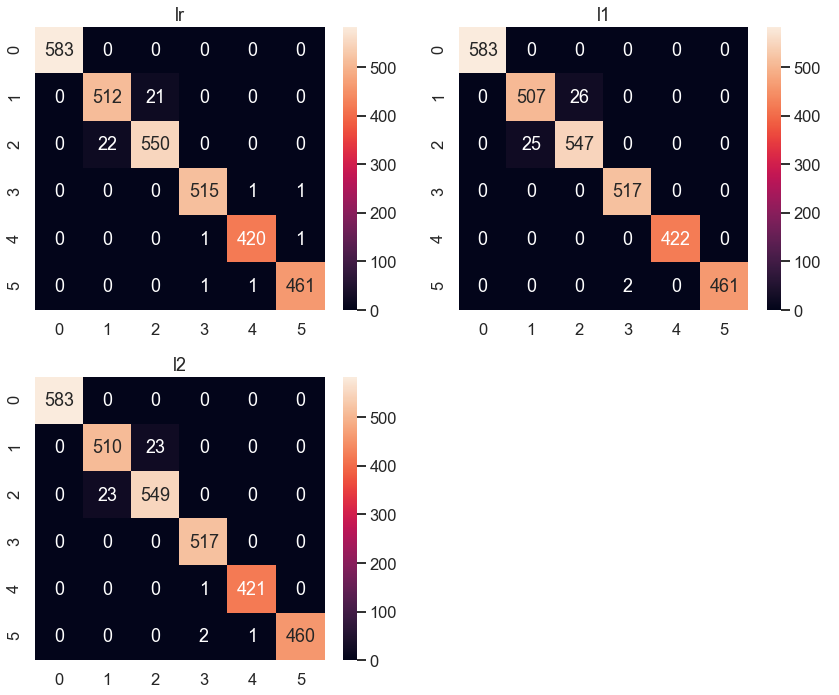

In [34]:
fig, axList=plt.subplots(nrows=2, ncols=2)
axList=axList.flatten()
fig.set_size_inches(12,10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d')
    ax.set(title=lab)
    
plt.tight_layout()